## Monthly AGP Reports

* Created to sniff-check validity of data for IE and ES
* Review of data uncovered some data errors.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pathlib import Path
from kedro.framework.context import load_context
pd.options.display.max_columns = 50

project_path = Path(os.getcwd()).parents[0].resolve()  # 2 levels up from this file
context = load_context(project_path)

orders_df = context.catalog.load("ie_es_2010_2020")
# modify before slicing
orders_df.AGP_BUDGET_USD = orders_df.AGP_BUDGET_USD.astype('float64')
orders_df['order_date_dt'] = pd.to_datetime(orders_df.ORDER_DATE, format='%Y-%m-%d')



2020-08-05 12:10:31,561 - kedro.io.data_catalog - INFO - Loading data from `ie_es_2010_2020` (PickleDataSet)...


c:\users\mandersen\anaconda3\envs\py37\lib\site-packages\kedro\framework\context\context.py:538: UserWarning: Credentials not found in your Kedro project config.
No files found in ['C:\\repo\\lifetime-dev\\conf\\base', 'C:\\repo\\lifetime-dev\\conf\\local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  str(exc)
c:\users\mandersen\anaconda3\envs\py37\lib\site-packages\fsspec\implementations\local.py:33: FutureWarning: The default value of auto_mkdir=True has been deprecated and will be changed to auto_mkdir=False by default in a future release.
  FutureWarning,


c:\users\mandersen\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


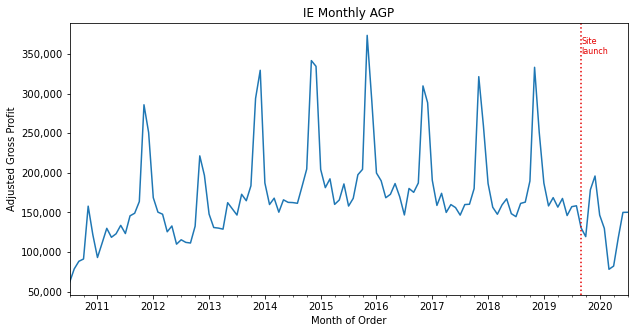

c:\users\mandersen\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


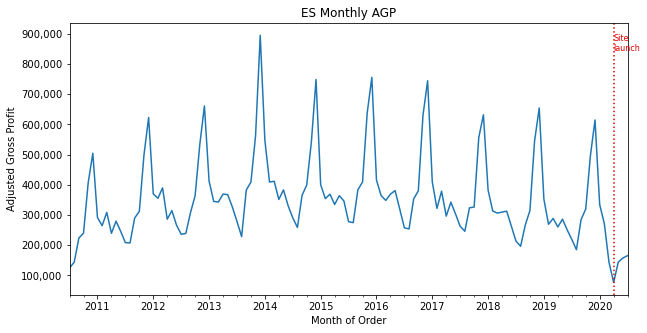

In [2]:
# avoid partial month cutoff
for country in ['IE', 'ES']:
    if country == 'IE':
        launch_date = pd.to_datetime('2019-09-04', format='%Y-%m-%d')
    elif country == 'ES':
        launch_date = pd.to_datetime('2020-04-07', format='%Y-%m-%d')
    else:
        assert False, f'Unsupported country {country}'

    country_df = orders_df[orders_df.ACCOUNT_CREATION_COUNTRY == country]
    country_df = country_df[orders_df.order_date_dt < pd.to_datetime('2020-08-01', format='%Y-%m-%d')]

    monthly = country_df.groupby(pd.Grouper(key='order_date_dt', freq='M')).AGP_BUDGET_USD.sum()
    ax = monthly.plot(figsize=(10, 5))
    ymin, ymax = ax.get_ylim()
    ax.axvline(x=launch_date, color='xkcd:red', linestyle='dotted')
    ax.annotate('Site\nlaunch', xy=(launch_date, ymax * 0.9),
                color='xkcd:red', fontsize=8)
    ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_xlabel('Month of Order')
    ax.set_ylabel('Adjusted Gross Profit')
    if country == 'IE':
        ax.set_title('IE Monthly AGP')
    else:
        ax.set_title(f'{country} Monthly AGP')

    plt.savefig(os.path.join('..', 'docs', 'source', f'{country.lower()}_monthly_agp.png'))
    plt.show()
